<a href="https://colab.research.google.com/github/andyavu/Linear-Nonlinear-Regressions/blob/main/Assignment_4_Linear_and_Nonlinear_Regressions_for_Crafting_Estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Andy Vu - 012264447 - Section 2

**Crafting Time Estimation**

In this assignment, we will be using regressions, of both the linear and non-linear persuasions.  We will be using these to create estimates in the amount of time required to get from a given crafting state to another crafting state, i.e. to produce a heuristic cost for the planning done in homework 2.  


We will be constructing the following models:

1. A linear regression solved via raw matrix operations, as discussed in class
2. A linear regression solved via numpy's library
3. A linear regression solved via Stochastic Gradient Descent with an artificial neural network
4. A linear regression using a deep artificial neural network
5. A non-linear regression using a deep artificial neural network

Finally, the non-linear regression will be used as the heuristic in an A* search of the planning space 

Our first step is to read the data in a form that is conducive for regression.  The data is a CSV file where the first row are the names of each column.  

In [ ]:
!wget https://raw.githubusercontent.com/adamsumm/AI_Minecraft_Assignments/master/CraftingRegressionEstimation/crafting_times.csv

--2020-11-26 03:20:05--  https://raw.githubusercontent.com/adamsumm/AI_Minecraft_Assignments/master/CraftingRegressionEstimation/crafting_times.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2128878 (2.0M) [text/plain]
Saving to: ‘crafting_times.csv.1’

crafting_times.csv. 100%[===================>]   2.03M  --.-KB/s    in 0.03s   

2020-11-26 03:20:05 (60.5 MB/s) - ‘crafting_times.csv.1’ saved [2128878/2128878]



In [ ]:
import numpy as np
#Open the file
with open('crafting_times.csv','r') as infile:
    #Get the header line
    header = infile.readline().rstrip().split(',')
    data = []
    #Read it in
    for line in infile:
        data.append([float(s) for s in line.rstrip().split(',')])
    #turn our list of lists into a numpy array
    data = np.array(data)
    
print('\n'.join(header))
print(data.shape)

time
initial_bench
initial_cart
initial_coal
initial_cobble
initial_furnace
initial_ingot
initial_iron_axe
initial_iron_pickaxe
initial_ore
initial_plank
initial_rail
initial_stick
initial_stone_axe
initial_stone_pickaxe
initial_wood
initial_wooden_axe
initial_wooden_pickaxe
goal_bench
goal_cart
goal_coal
goal_cobble
goal_furnace
goal_ingot
goal_iron_axe
goal_iron_pickaxe
goal_ore
goal_plank
goal_rail
goal_stick
goal_stone_axe
goal_stone_pickaxe
goal_wood
goal_wooden_axe
goal_wooden_pickaxe
(30000, 35)


We see that the columns are: 
0 -- The time it takes
1-17 -- The initial state
18-35 -- The goal state

Now, we need to construct our X and Y matrices.

Luckily, *slicing* is very easy to do with numpy arrays.  *Slicing* is where we can easily specify how to take subsets of our matrix.  Think of it like indexing into an array, only we can do a lot of them at once.


The general syntax is:

`vector[a:b]`
`matrix[a:b,c:d]` 
`tensor[a:b,c:d,e:f]`

As a note, `a, b, c, d, e, f` are the indices you wish to get -- if `a` is blank it will start from the beginning and if `b` is blank it will go until the end.  Note: these can also be negative, which can be thought of as `n` away from the end.

Some examples:

`data[:,0]` -- Get all of the members of the first column 
`data[:,-1]` -- Get all of the members of the last column
`data[:a,1:]` -- Get the first `a` rows for the 2nd to last columns
`data[a:,1:]` -- Get all of the rows starting at `a` for the 2nd to last columns

As a note, you can get the dimensions of a numpy array by accessing `.shape`, a tuple of the dimensions

#Step 1 -- Set up Matrics  (15 pts)
* Let the first N*validation_split rows be for the validation set 
* and the last N*(1-validation_split) rows be the training data
* At the end of this, you should have:
    
    `Y.shape = (21000, 1)`

    `X.shape = (21000, 34)`

    `Y_validation.shape = (9000, 1)`

    `X_validation.shape = (9000, 34)`

In [ ]:
#We want to use a training/validation split to verify we are doing a good job
validation_split = 0.3


#TODO slice the data into the correct matrices for training and validation splits 
#Let the first N*validation_split rows be for the validation set 
#and the last N*(1-validation_split) rows be the training data

Y = data[int(data.shape[0] * validation_split):, 0:1]
Y_validation = data[0:int(data.shape[0] * validation_split), 0:1]

X = data[int(data.shape[0] * validation_split):, 1:]
X_validation = data[0:int(data.shape[0] * validation_split), 1:]

print(Y.shape)
print(X.shape)
print(Y_validation.shape)
print(X_validation.shape)

(21000, 1)
(21000, 34)
(9000, 1)
(9000, 34)


Now we will use Least Squares Regression to estimate the time cost associated with a given state and end state.  

The least squares regression coefficients can be calculated via the closed form solution:

$\beta =  (X^T X)^{-1} X^T Y$

First try it out with using `np.dot` (anywhere there is a matrix multiplication) and `np.inv` (anywhere there is a matrix inversion. (as a note, matrix transposition is accomplished with `.T`)

Next, compare using `np.linalg.lstsq` -- numpy's built in least squares regression (that is much more stable than using the matrix inversion found here).

#Step 2 -- Perform Linear Regressions (10 pts)
* Write your own version of linear regression using the closed from solution discussed above
* Use the supplied least squares regression that is part of numpy's linear algebra library
* Compare the two


In [ ]:
#Least Squares Estimation Goes Here


#TODO replace the np.zeros() with the correct code

def calculate_weights_with_linear_algebra(X: np.array, Y: np.array) -> np.array:
    Xt_X = X.T.dot(X)               # X^T * X
    Xt_X_inv = np.linalg.inv(Xt_X)  # (X^T * X)^-1
    Xt_Y = X.T.dot(Y)               # X^T * Y
    B = Xt_X_inv.dot(Xt_Y)          # ((X^T * X)^-1) * (X^T * Y)
    return B


def calculate_weights_with_library(X: np.array, Y: np.array) -> np.array:
    x, residuals, rank, s = np.linalg.lstsq(X, Y)
    return x


B_raw = calculate_weights_with_linear_algebra(X,Y)
B_lstsq = calculate_weights_with_library(X,Y)

#This should be small, mostly in the 1e-13 to 1e-14 range
print(B_raw-B_lstsq)

[[ 1.52766688e-13]
 [ 4.47819559e-12]
 [-3.94684285e-14]
 [-6.81676937e-14]
 [-5.09814413e-13]
 [ 3.68594044e-14]
 [ 1.19149135e-12]
 [ 3.81250587e-13]
 [ 1.05471187e-15]
 [-2.62012634e-14]
 [-4.31599201e-15]
 [-3.01980663e-14]
 [-6.48370246e-14]
 [-1.77635684e-15]
 [ 2.75890422e-14]
 [-2.75335310e-14]
 [-3.99680289e-14]
 [ 1.62092562e-13]
 [ 5.68434189e-14]
 [ 1.24344979e-14]
 [-1.02140518e-14]
 [ 2.48689958e-14]
 [-1.42108547e-14]
 [ 2.84217094e-14]
 [-1.13686838e-13]
 [ 1.24344979e-14]
 [-2.93098879e-14]
 [ 7.10542736e-15]
 [-2.69922973e-15]
 [-8.52651283e-14]
 [ 1.19904087e-14]
 [ 3.73034936e-14]
 [-5.59552404e-14]
 [-2.39808173e-14]]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  from ipykernel import kernelapp as app


Now we want to test our coefficients and see how well we predict the answer.  To do with we will need to use the weight vector we just learned.  Use `np.dot` to calculate:

$\hat{Y} = X\beta$

We will then calculate the *residual* -- the error that remains between our true times in Y and the calculated times in Yhat.

$resid = Y-\hat{Y} $

We will then use these residuals to come up with a single number that tells us how well we did.  For this, we will be using the Root Mean Squared Error (RMSE)

$RMSE = \sqrt{\frac{1}{N} \sum (y-\hat{y})^2}$

To do this we will use the elementwise multiplication (`a*b` not `np.dot(a,b)`), the square root (`np.sqrt`), and mean (``np.mean``) functions

#Step 3 -- Inference (5 pts)         
* Calculate the predicted values 
* Calculate the error

In [ ]:
#TODO: Calculate Yhat, the residuals and RMSE for both the training and validation sets

def calculate_yhat(X: np.array, B: np.array) -> np.array:
    return X.dot(B)

def calculate_residuals(Y: np.array, Yhat: np.array) -> np.array:
    return Y - Yhat

def calculate_rmse(residuals: np.array) -> float:
    return np.sqrt((1 / data.shape[0]) * ((residuals) ** 2).mean())


Yhat = calculate_yhat(X, B_raw)
Yhat_validation = calculate_yhat(X_validation, B_raw)

residuals  = calculate_residuals(Y, Yhat)
residuals_validation  = calculate_residuals(Y_validation, Yhat_validation)

rmse = calculate_rmse(residuals)
rmse_validation = calculate_rmse(residuals_validation)

print('RMSE:',rmse)
print('RMSE Validation:',rmse_validation)


RMSE: 0.2462448076185721
RMSE Validation: 0.37508828357117036


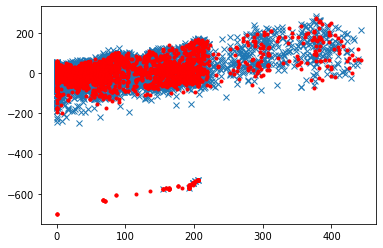

In [ ]:
import matplotlib.pyplot as plt

#Now let's plot our points residuals
#Often, we'd like to plot our data, but we have a 30+dimensional space, i.e. one that's hard to visualize
plt.plot(Y,residuals,'x')
plt.plot(Y_validation,residuals_validation,'r.')
plt.show()



Previously, we learned a weight vector, but because we didn't have a bias term, the weight vector has to go through the origin, which might not be what we want.  Let's try it all again with a bias term this time.

To add a bias term, we will add a new column to our X matrix that is full of constants.  

Does it matter what constant term we choose?

The simplest way to do this is to use `hstack` which takes in a list of matrices and horizontally concatenates them (i.e. adds on new columns -- there exists a `vstack` that adds new rows).  The simpleest way to construct a constant term is to use `np.ones` which takes in a list with the number of ones to make for each dimension.

e.g.
`np.ones([4,2])` will make

1 1

1 1 

1 1

1 1

#Step 4 -- Add a bias term (5 pts)
* Add a bias term to the independent data -- `X`
* Rerun the previous code 
* Compare the new errors to the old

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  from ipykernel import kernelapp as app


RMSE with bias term: 0.21481494463186607
RMSE Validation with bias term: 0.331270058103509


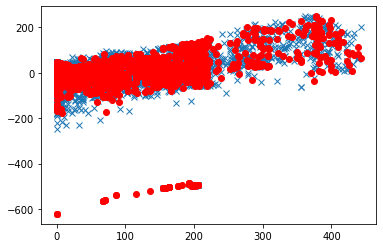

In [ ]:
#TODO construct an X matrix with a bias term. 

X_with_bias = np.hstack((X, np.ones((X.shape[0], 1), dtype=X.dtype)))
X_validation_with_bias = np.hstack((X_validation, np.ones((X_validation.shape[0], 1), dtype=X_validation.dtype)))

#TODO replace the np.zeros() with the correct code
B_with_bias = calculate_weights_with_library(X_with_bias,Y)

Yhat_with_bias = calculate_yhat(X_with_bias, B_with_bias)
Yhat_validation_with_bias = calculate_yhat(X_validation_with_bias, B_with_bias)

residuals_with_bias  = calculate_residuals(Y, Yhat_with_bias)
residuals_validation_with_bias  = calculate_residuals(Y_validation, Yhat_validation_with_bias)

rmse_with_bias = calculate_rmse(residuals_with_bias)
rmse_validation_with_bias = calculate_rmse(residuals_validation_with_bias)


print('RMSE with bias term:',rmse_with_bias)
print('RMSE Validation with bias term:',rmse_validation_with_bias)

plt.plot(Y,residuals_with_bias,'x')
plt.plot(Y_validation,residuals_validation_with_bias,'ro')
plt.show()


Now we are going to use artificial neural networks. We are going to be using PyTorch, one of the leading deep learning libraries. 

NOTE: We are going to be doing this in a GPU enabled way, so be sure to make sure your runtime is set to use a GPU -- Runtime > Change Runtime Type > Hardware Accelerator = GPU


First lets use stochastic gradient descent to train a weight vector as we did above.  

PyTorch lets us do this in a number of ways, but we will be doing the easiest possible one.  We are going to construct a `Sequential` model, with a `Linear` layer as its sole argument. `Sequential` can take in an arbitrary number of arguments, where each one is a layer that will be applied in the order that it is passed in.

The parameters you care about for `Linear` are:

`Linear(in_features, out_features, bias=True)`
    
`in_features` is the dimensionality of our input space -- in this case it will be the number of columns found in our X data
`out_features` is the dimensionality of the output space -- in this case, it will be 1 (all of our final `out_features` will always be 1, as our output is the single number we are predicting).  

# Step 5 -- Artificial Neural Network (15 pts)
* Construct a linear regression model in PyTorch

In [ ]:
import torch


#TODO construct the model
# Define a neural network model as a stack of layers
model = torch.nn.Sequential(
    torch.nn.Linear(X.shape[1], 1, bias=True),
    # torch.nn.Linear(X.shape[1], 1, bias=True),
    # torch.nn.Linear(X.shape[1], 1, bias=True)
)
model.to('cuda')

print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.1667, -0.0020, -0.0611,  0.1199, -0.1582,  0.1382,  0.1603,  0.0677,
         -0.1566,  0.1521,  0.1360,  0.1424,  0.1216, -0.1286, -0.0972, -0.1215,
          0.0652, -0.1207,  0.0488,  0.1205, -0.0751, -0.0023,  0.0563,  0.1319,
          0.1237, -0.0309, -0.0086, -0.1499, -0.1412, -0.0179,  0.0859,  0.0561,
         -0.1216, -0.0740]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([0.0088], device='cuda:0', requires_grad=True)]


Given our model, it's now time to train it.  First we need to convert our numpy matrices into PyTorch Tensors.  

Then we need to set up a couple of things --

First, we need to choose which optimizer we are going to use.  For this, let's just go with simple stochastic gradient descent.  `torch.optim.SGD(model.parameters(),lr=LR)` -- you'll need to pick a learning rate.  It's usually best to pick something relatively small, like say 0.01.

Then we need to choose our loss function.  If our goal is to do a regression, we should choose the loss function we chose before, i.e. Mean Square Error --  `torch.nn.MSELoss()`


Then, we need to loop over our dataset a number of times, i.e. a number of *epochs*.  At each step of the process we need to:

1. Zero the gradients from the previous epoch -- `optimizer.zero_grad()` and `model.zero_grad()`
2. Run the model in the forward direction -- `Yhat = model.forward(Xt)`
3. Calculate the loss between our predictions and the truth -- `loss = loss_fn(Yhat,Yt)`
4. Calculate back propagation of the loss through the network -- `loss.backward()`
5. Run the stochastic gradient descent and update the weights -- `optimizer.step()`

Some libraries hide all of these aspects, but PyTorch makes you do them explicitly.  It results in a little more code, but allows for some very fancy models (those involving different losses being calculated independently) to be done with very little change in the code.

#Step 6 -- Training Your Model (20 pts)
* Set up your training method
* Set up your loss function 
* Run the training process as defined above

In [ ]:

# Convert our numpy arrays to torch tensors
Xt = torch.Tensor(X).to('cuda')
# To make Yt match the shape of Yhat, we'll need it to be a slightly different shape
Yt = torch.Tensor(Y.reshape((len(Y), 1))).to('cuda')



def train(X: torch.Tensor, Y: torch.Tensor, model: torch.nn.Module, epochs:int) -> None:
    #TODO set the optimizer and loss functions
    optimizer = torch.optim.SGD(model.parameters(),lr=0.01)

    #TODO set the loss function
    # We'll use mean squared error as our loss function
    loss_fn = torch.nn.MSELoss()

    for t in range(epochs):
        #TODO do the training steps here
        #1. zero the gradient buffers
        #1. Clear out the "gradient", i.e. the old update amounts
        optimizer.zero_grad()
        model.zero_grad()
        #2. Make a prediction
        Yhat = model.forward(Xt)
        #3. Calculate loss (the error of the residual)
        loss = loss_fn(Yhat, Yt)
        if t % 100 == 0:
            print(t,loss.item())

        #4. Run the loss backwards through the graph
        loss.backward()
        #5. Run the optimizer to update the weights
        optimizer.step()
train(Xt,Yt,model, 5000)

0 9301.98046875
100 3030.58544921875
200 2503.88623046875
300 2252.59619140625
400 2092.4189453125
500 1975.3900146484375
600 1883.275634765625
700 1807.9637451171875
800 1745.20263671875
900 1692.3746337890625
1000 1647.6536865234375
1100 1609.6611328125
1200 1577.3062744140625
1300 1549.704345703125
1400 1526.125732421875
1500 1505.962890625
1600 1488.7061767578125
1700 1473.9266357421875
1800 1461.26123046875
1900 1450.4027099609375
2000 1441.089111328125
2100 1433.097900390625
2200 1426.2392578125
2300 1420.35107421875
2400 1415.294921875
2500 1410.9521484375
2600 1407.2216796875
2700 1404.0166015625
2800 1401.2623291015625
2900 1398.895263671875
3000 1396.8607177734375
3100 1395.11181640625
3200 1393.6082763671875
3300 1392.3154296875
3400 1391.203857421875
3500 1390.2481689453125
3600 1389.426025390625
3700 1388.718994140625
3800 1388.111083984375
3900 1387.5880126953125
4000 1387.1380615234375
4100 1386.7509765625
4200 1386.418212890625
4300 1386.1317138671875
4400 1385.88525390

Now we want to see how it did.  We will plot the residuals (i.e. the error) for both our training set and our validation set.  It is always important to have a validation set, as it will let us see how well our model is over (or under) fitting the data.

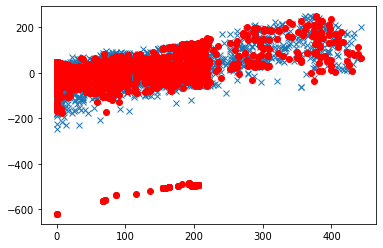

RMSE: 0.21486294181346133
Validation RMSE: 0.33086827756569803


In [ ]:
Yhat = model.forward(Xt).cpu().data.numpy()

residual  = calculate_residuals(Y, Yhat)

plt.plot(Y,residual,'x')

Yhat_validation = model.forward(torch.Tensor(X_validation).type(torch.FloatTensor).cuda()).cpu().data.numpy()

residual_validation  = calculate_residuals(Y_validation, Yhat_validation)

plt.plot(Y_validation,residual_validation,'ro')
plt.show()


print('RMSE:',calculate_rmse(residual))
print('Validation RMSE:',calculate_rmse(residual_validation))


...And we do just about the same as we did before.

Now let's try it with some hidden layers.  Instead of just 1 Linear layer, we will have multiple layers.  As with the last one, we will have to specify the in_dimensions (identical to that one).  However, instead of an out_dimension of 1, we will go to the number of hidden_units, let's say 100.  Then we will have an output layer, which will go from our hidden_units dimension to an out_dimension of 1.

Again, your model summary should look similar to below (layer weights will be different)

#Step 7 -- Multi Layer Neural Network (10 pts)
* Create a neural network with 1 hidden layer (i.e. 2 layers, Input -> Hidden, Hidden -> Output)

In [ ]:
hidden_units = 100
#TODO construct the model
# Define a neural network model as a stack of layers

model = torch.nn.Sequential(
    torch.nn.Linear(X.shape[1], hidden_units, bias=True),
    torch.nn.Linear(hidden_units, 1, bias=True)
)

model.to('cuda')
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.1201,  0.1640, -0.1251,  ..., -0.0837, -0.0998,  0.0624],
        [-0.1443,  0.1465, -0.0794,  ..., -0.0045,  0.1681,  0.0509],
        [ 0.1241,  0.0297,  0.0137,  ...,  0.0888,  0.1544, -0.0960],
        ...,
        [ 0.0631,  0.0679,  0.1622,  ..., -0.1258,  0.0522, -0.0793],
        [-0.1420,  0.0760, -0.1102,  ..., -0.0565, -0.1210, -0.0160],
        [-0.0731, -0.1698,  0.0282,  ..., -0.1486,  0.0768,  0.0708]],
       device='cuda:0', requires_grad=True), Parameter containing:
tensor([ 0.0678,  0.0473, -0.0879, -0.1534, -0.0398, -0.0961,  0.0820,  0.0428,
        -0.0405,  0.0918, -0.1551, -0.0625,  0.1105, -0.0349,  0.0917, -0.1131,
         0.0690, -0.1549,  0.0899, -0.0286, -0.0314, -0.0068,  0.0570,  0.1583,
         0.0193,  0.1560, -0.0694, -0.0460,  0.1043, -0.0767, -0.0750, -0.1285,
         0.1101, -0.1246,  0.0276,  0.0338, -0.1370, -0.0382, -0.0916, -0.0199,
        -0.0557, -0.0819,  0.1520,  0.0594, -0.0240, -0.1343, -0.1655, -0.04

Copy your training code from above and let's see how well it does.

In [ ]:
    
train(Xt,Yt,model, 300)

0 9352.4267578125
100 nan
200 nan


Hmmmm.....that's no good. Our loss quickly explodes and goes to nan.  This is cause by our stochastic gradient descent ping-ponging back and forth.  Instead of converging it keeps overshooting more and more until it goes beyond the floating point limit.  Obviously, that isn't what we want.

We can address this in one of 2 ways:

1. We can shrink out learning rate to a small enough value that this no longer occurs
2. We can clip our gradients to make sure they don't exceed a specific value

We can do it the first way, but that will slow our training.  The second can be achieved by adding a step into our training process:


1. Zero the gradients from the previous epoch -- `optimizer.zero_grad()` and `model.zero_grad()`
2. Run the model in the forward direction -- `Yhat = model.forward(Xt)`
3. Calculate the loss between our predictions and the truth -- `loss = loss_fn(Yhat,Yt)`
4. Calculate back propagation of the loss through the network -- `loss.backward()`
5. **Clip the gradients** -- `torch.nn.utils.clip_grad_norm_(model.parameters(),5)`
6. Run the stochastic gradient descent and update the weights -- `optimizer.step()`

Copy your model construction with the hidden layers from above, and then set up an optimization loop with gradient clipping.

#Step 8 -- Gradient Clipping  (10 pts)
* Modify your training method from step 6 to add in Gradient Clipping

In [ ]:

def train_with_gradient_clipping(X: torch.Tensor, Y: torch.Tensor, model: torch.nn.Module, epochs:int) -> None:
    #TODO set the optimizer and loss functions
    optimizer = torch.optim.SGD(model.parameters(),lr=0.01)

    #TODO set the loss function
    # We'll use mean squared error as our loss function
    loss_fn = torch.nn.MSELoss()
    for t in range(epochs):

        #TODO do the training steps here
        #1. zero the gradient buffers
        #1. Clear out the "gradient", i.e. the old update amounts
        optimizer.zero_grad()
        model.zero_grad()
        #2. Make a prediction
        Yhat = model.forward(Xt)
        #3. Calculate loss (the error of the residual)
        loss = loss_fn(Yhat,Yt)
        if t % 100 == 0:
            print(t,loss.item())

        #4. Run the loss backwards through the graph
        loss.backward()
        #5. Clip the gradients
        torch.nn.utils.clip_grad_norm_(model.parameters(),5)
        #6. Run the optimizer to update the weights
        optimizer.step()
train_with_gradient_clipping(Xt,Yt,model, 5000)

0 nan
100 nan
200 nan
300 nan
400 nan
500 nan
600 nan
700 nan
800 nan
900 nan
1000 nan
1100 nan
1200 nan
1300 nan
1400 nan
1500 nan
1600 nan
1700 nan
1800 nan
1900 nan
2000 nan
2100 nan
2200 nan
2300 nan
2400 nan
2500 nan
2600 nan
2700 nan
2800 nan
2900 nan
3000 nan
3100 nan
3200 nan
3300 nan
3400 nan
3500 nan
3600 nan
3700 nan
3800 nan
3900 nan
4000 nan
4100 nan
4200 nan
4300 nan
4400 nan
4500 nan
4600 nan
4700 nan
4800 nan
4900 nan


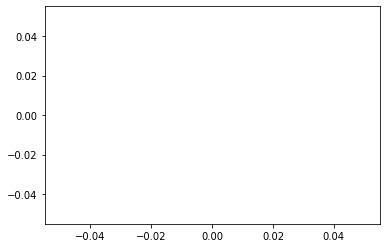

RMSE: nan
Validation RMSE: nan


In [ ]:
Yhat = model.forward(Xt).cpu().data.numpy()

residual  = calculate_residuals(Y, Yhat)

plt.plot(Y,residual,'x')

Yhat_validation = model.forward(torch.Tensor(X_validation).type(torch.FloatTensor).cuda()).cpu().data.numpy()

residual_validation  = calculate_residuals(Y_validation, Yhat_validation)

plt.plot(Y_validation,residual_validation,'ro')
plt.show()


print('RMSE:',calculate_rmse(residual))
print('Validation RMSE:',calculate_rmse(residual_validation))


Wait, that looks just like it did before!  The key to neural networks comes from the non-linear activations.  No matter how many layers we add, so long as the rank of the hidden layers is $\geq$ the rank of the original vector, the best we can do is the least squares estimation (as it is the maximum likelihood estimator for a linear regression).  If the rank is decreased, then we are doing some form of compression, akin to Principal Component Analysis.  Let's try it with a bit of nonlinearity. 

Let's do a single hidden layer with a non-linear activation -- we will use the Rectified Linear Unit (ReLU) as it is fast and all we really care about is ANY kind of nonlinearity (sometimes we care about our nonlinearity having a specific meaning or mapping into a specific range (0 to 1, -1 to 1, etc.).

This means we should now have a Sequential model with

1. A Linear layer going from our input dimension to the number of hidden units
2. A ReLU activation layer -- `torch.nn.ReLU()`
3. A Linear layer going from our hidden units to 1


#Step 9 -- Create a non-linear multi layer Neural Network (10 pts)
* Your network should be two layers like above, but should have a non-linear activation function (the ReLU) (e.g.  Input -> Hidden, ReLU, Hidden -> Output)


In [ ]:
hidden_units = 100
#TODO construct the model
# Define a neural network model as a stack of layers
model = torch.nn.Sequential(
    torch.nn.Linear(X.shape[1], hidden_units, bias=True),
    torch.nn.ReLU(),
    torch.nn.Linear(hidden_units, 1, bias=True)
)


model.to('cuda')
print(list(model.parameters()))

[Parameter containing:
tensor([[-0.1337,  0.0649,  0.0238,  ..., -0.0119,  0.1617,  0.0279],
        [ 0.0182, -0.1128,  0.1562,  ..., -0.1040,  0.1439,  0.0871],
        [ 0.0473, -0.0523, -0.0491,  ...,  0.0188, -0.0386,  0.0003],
        ...,
        [-0.1505, -0.1510, -0.0879,  ..., -0.1583, -0.0279, -0.0795],
        [-0.0580,  0.1684,  0.0853,  ...,  0.0853, -0.0659,  0.0585],
        [-0.0529,  0.1229,  0.1358,  ...,  0.0194, -0.0857,  0.1623]],
       device='cuda:0', requires_grad=True), Parameter containing:
tensor([ 1.0144e-01,  1.5516e-01,  3.5186e-02, -1.3726e-01,  8.3922e-02,
        -4.2502e-02, -7.4714e-02,  4.4967e-02,  1.3545e-01, -7.8849e-02,
        -7.0689e-02,  1.3956e-01,  3.4858e-02, -1.2563e-01,  1.0304e-01,
         4.1198e-02, -7.6411e-02, -1.5894e-01, -4.3684e-02,  1.0530e-01,
        -4.9171e-02, -1.0296e-01, -9.4605e-02,  1.0421e-01, -1.3814e-01,
        -7.1407e-02,  2.6553e-02,  1.4122e-01,  4.7492e-02,  1.0763e-01,
         1.0261e-01, -6.5840e-02, -1.2

Use the optimization code with the gradient clipping from above to train our new, non-linear, model.  I recommend letting it run for about 10000 epochs.


In [ ]:

train_with_gradient_clipping(Xt,Yt,model, 10000)

0 9409.26171875
100 6210.08251953125
200 3807.02197265625
300 2431.234375
400 1687.7366943359375
500 1168.8941650390625
600 974.0377807617188
700 906.2246704101562
800 874.839111328125
900 853.11181640625
1000 836.1600952148438
1100 821.0552978515625
1200 806.9554443359375
1300 792.8865966796875
1400 778.2609252929688
1500 762.9024047851562
1600 746.7078247070312
1700 729.3150634765625
1800 710.496337890625
1900 689.8029174804688
2000 668.3060913085938
2100 646.5574340820312
2200 625.1729736328125
2300 604.37841796875
2400 584.3176879882812
2500 565.2559204101562
2600 547.2608642578125
2700 530.3607788085938
2800 514.6117553710938
2900 500.03790283203125
3000 486.55950927734375
3100 474.1283874511719
3200 462.5975036621094
3300 451.8861999511719
3400 441.95159912109375
3500 432.6777038574219
3600 424.0002746582031
3700 415.90179443359375
3800 408.3739013671875
3900 401.3437194824219
4000 394.7353820800781
4100 388.5810852050781
4200 382.81280517578125
4300 377.3612365722656
4400 372.22

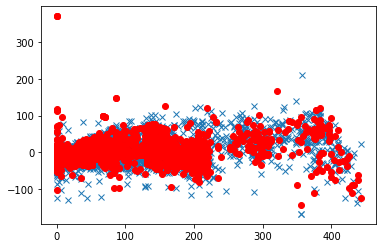

RMSE: 0.09370327887392924
Validation RMSE: 0.10133446439107072


In [ ]:
Yhat = model.forward(Xt).cpu().data.numpy()

residual  = calculate_residuals(Y, Yhat)

plt.plot(Y,residual,'x')

Yhat_validation = model.forward(torch.Tensor(X_validation).type(torch.FloatTensor).cuda()).cpu().data.numpy()

residual_validation  = calculate_residuals(Y_validation, Yhat_validation)

plt.plot(Y_validation,residual_validation,'ro')
plt.show()


print('RMSE:',calculate_rmse(residual))
print('Validation RMSE:',calculate_rmse(residual_validation))


Ah, that looks better.  Note, you are probably overfitting (it is the tendency of these techniques), you can try some form of regularization (e.g., dropout) to reduce this overfitting for extra-credit.  

You can try to explore different network topologies (different numbers of layers, different activation functions) and different training techniques to see how well you can do on the validation set.

Now, let's use this as a heuristic for our search.

Below are the helper functions needed -- use them in your A* implementation

#BONUS -- A* (15 pts)
* Implement A* search for the MineCraft planning domain, using the above estimates as  heuristics

In [ ]:
import json
from typing import NamedTuple, Dict, Tuple, Optional, Sequence, List, Set, FrozenSet
import array
import heapq
import time
import itertools

with open('Crafting.json') as f:
    Crafting = json.load(f)
items_by_index = list(sorted(Crafting['Items']))
items_to_indices = {item: index for index, item in enumerate(items_by_index)}

class State:

    def __init__(self, items=None) :
        if items is not None:
            # Copying a state from an old state.
            # This call to the array constructor creates an array of unsigned integers and initializes it from the contents of items.
            self.items = array.array('I', items)
        else:
            self.items = array.array('I', [0 for item in items_by_index])

    def __add__(self, other):
        s = State(self.items)
        # A. How do we add together the contents of two states?
        for ii,oi in enumerate(other.items):
            s.items[ii] += oi
        return s
    def __sub__(self, other):
        s = State(self.items)
        # A. How do we add together the contents of two states?
        for ii,oi in enumerate(other.items):
            s.items[ii] -= oi
        return s

    def __ge__(self, other):
        # C. How do we know whether one state (self) contains everything that's inside of another (other)? 
        for si,oi in zip(self.items,other.items):
            if si < oi:
                return False
        return True
        
    def __lt__(self, other):
        return not (self >= other)

    def __eq__(self, other):
        return self.items == other.items

    def __hash__(self):
        hsh = 5381
        for s in self.items:
            hsh = ((hsh << 5) + hsh) + s
        return hsh

    def __str__(self):
        out_str = []
        for k,v  in self.to_dict().items():
            out_str.append('{}:{}'.format(k,v))
        return ','.join(out_str)

    def to_dict(self):
        return {items_by_index[idx]: self.items[idx]
                for idx in range(len(self.items))}

    @classmethod
    def from_dict(cls, item_dict: Dict[str, int]) -> 'State':
        return cls([
            item_dict.get(item, 0) for item in items_by_index
        ])
    
class Recipe(NamedTuple):
    produces: State
    consumes: State
    requires: State
    cost: int

recipes: Dict[str, Recipe] = {}
for name, rule in Crafting['Recipes'].items():
    recipes[name] = Recipe(
        State.from_dict(rule.get('Produces', {})),
        State.from_dict(rule.get('Consumes', {})),
        State.from_dict({item: 1 if req else 0
                         for item, req in rule.get('Requires', {}).items()}),
        rule['Time']
    )
    
def preconditions_satisfied(state: State, recipe: Recipe) -> bool:
    return state >= recipe.consumes and state >= recipe.requires

def apply_effects(state: State, recipe: Recipe) -> State:
    return state-recipe.consumes+recipe.produces

FileNotFoundError: ignored

In [ ]:
import random

def states_to_tensor(initial_state:State , goal_state:State) -> torch.Tensor:
    items = ['bench','cart','coal','cobble',
     'furnace','ingot','iron_axe',
     'iron_pickaxe','ore','plank','rail',
     'stick','stone_axe','stone_pickaxe',
     'wood','wooden_axe','wooden_pickaxe']
    data = []
    initial_state = initial_state.to_dict()
    goal_state = goal_state.to_dict()
    for i in items:
        data.append([initial_state[i]])
    for i in items:
        data.append([goal_state[i]])
    return torch.Tensor(np.array(data).T)


def get_heuristic(current_state:State , goal_state:State) -> float:
    return model.forward(states_to_tensor(current_state,goal_state)).data.numpy()[0,0]


pruning = [State.from_dict({'cobble':9}),
           State.from_dict({'wood':3}),
           State.from_dict({'plank':9}),
           State.from_dict({'ore':2}),
           State.from_dict({'stick':6}),
           State.from_dict({'bench':2}),
           State.from_dict({'furnace':2}),
           State.from_dict({'iron_axe':2}),
           State.from_dict({'iron_pickaxe':2}),
           State.from_dict({'stone_axe':2}),
           State.from_dict({'stone_pickaxe':2}),
           State.from_dict({'wooden_axe':2}),
           State.from_dict({'wooden_pickaxe':2}),
           State.from_dict({'coal':2})]

def prune(state:State) -> bool:
    to_prune = False
    for p in pruning:
        if state >= p:
            to_prune = True
            break
                        
    return to_prune

In [ ]:

#TODO implement A* search
#It should return a tuple of the number of states visited, the time cost, 
#and the path of recipes it takes (as a list of recipe names)
#Break the loop when you have visited max_nodes
#I recommend using the above prune method after applying a recipe 
#but before adding a node to the open set


def a_star(initial:State, goal:State, max_nodes:int) -> Tuple[int, int,Optional[List[str]]]:
    pass

In [ ]:

print(a_star(State.from_dict({'wood':1}),State.from_dict({'wooden_pickaxe':1}),1000))
print(a_star(State.from_dict({'wood':1}),State.from_dict({'iron_pickaxe':1}),20000))
print(a_star(State.from_dict({}),State.from_dict({'rail':1}),20000))
print(a_star(State.from_dict({}),State.from_dict({'cart':1}),20000))
